######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#02075d">Advanced Regression techniques: House Price Prediction

**Lasso Regression, Gradient Boosting Regression, Random Forest Regression, ElasticNet Regression, and XGBoost Regression**

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Import train and test Datasets

In [2]:
# train_df = pd.read_csv('/Users/preethamvignesh/Downloads/check/Housing/train.csv')
# test_df = pd.read_csv('/Users/preethamvignesh/Downloads/check/Housing/test.csv')

train_df = pd.read_csv('/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Data/House_price/train.csv')
test_df = pd.read_csv('/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Data/House_price/test.csv')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Display DataFrame

In [3]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Data column details 

**PoolQC: pool quality**
- Ex: excellent, Gd: good, TA: average/Typical, Fa: Fair, NA: no pool

**Alley: Type of alley access to property**
- Gravl: Gravel, Pave: Paaved, NA: No alley access

**Fence: Fence quality**
- GdPrv: Good privacy, MnPrv: Minimum privacy, GdWo: Good wood, MnWw: Minimum wood/wire, NA: No fence

**MiscFeature: Miscellaneous feature**
- Gar2: 2nd Garage, othr: other, Shed: shed, Tenc: Tennis Court, NA: none

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#4a3dbb">Feature Engineering: Total missing and paramater wise missing

In [4]:
#Missing or null values in the train dataset
train_missing = train_df.isnull().sum()
#total missing sum
display("Total missing: ", train_missing.sum())

#each column/variable missing sum
train_missing = train_missing.reset_index()
train_missing.T

'Total missing: '

6965

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,259,0,0,1369,0,0,0,...,0,1453,1179,1406,0,0,0,0,0,0


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Null values filling method: Aggregate fill method
    
- count will give how many are missing in the column, and divide then with total count,  we can find the possibilities of them.

In [5]:
#NULL or missing values Filling method 
#Aggregate filling method

# %run -i '/Users/preethamvignesh/Desktop/Work/ML_EIT/Github/filling_agg.py'
%run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Github/filling_agg.py'

filling_agg(train_df)
filling_agg(test_df)

trn_fill = sum(train_df.isna().sum())
tst_fill = sum(test_df.isna().sum())
display(trn_fill, tst_fill)

0

0

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Numerical and Categorical columns in the dataframe

In [6]:
#Define numerical and categorical columns
numerical_cols = []
categorical_cols = []

numerical_cols =  train_df.select_dtypes(exclude = ['object']).columns
categorical_cols = test_df.select_dtypes(include = ['object']).columns

display(numerical_cols, len(numerical_cols))
display(categorical_cols, len(categorical_cols))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

38

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

43

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#4a3dbb">Exploratory Data Analysis (EDA)

In [7]:
# Exploratory data analysis (EDA)
train_df.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

Text(0, 0.5, 'count')

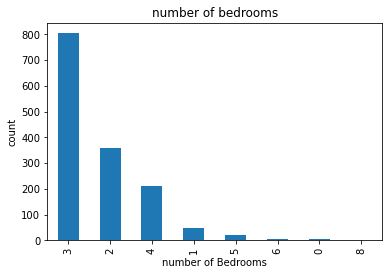

In [8]:
# check most common house (bedroom wise)
train_df['BedroomAbvGr'].value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('number of Bedrooms')
plt.ylabel('count')

Text(0, 0.5, 'count')

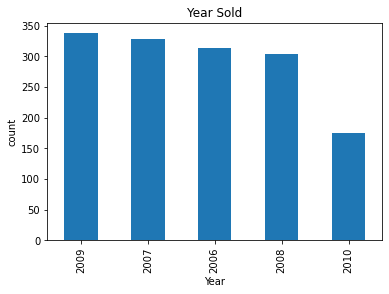

In [9]:
# check most common house (bedroom wise)
train_df['YrSold'].value_counts().plot(kind='bar')
plt.title('Year Sold')
plt.xlabel('Year')
plt.ylabel('count')

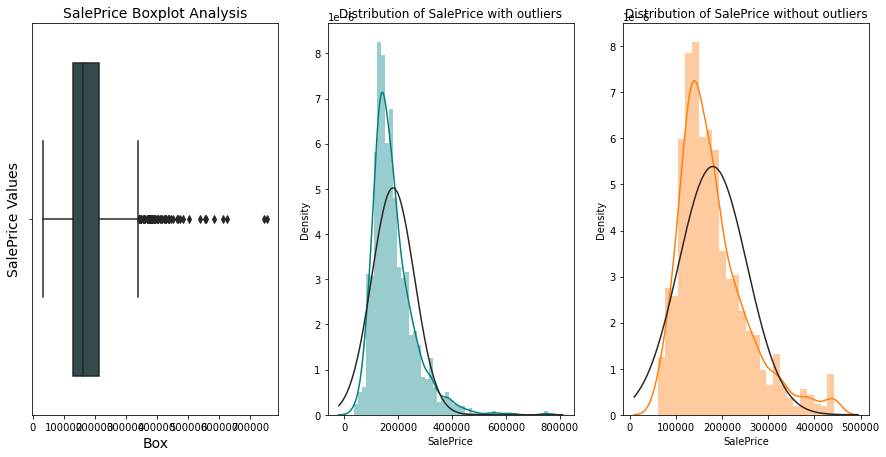

In [10]:
from scipy import stats; from scipy.stats import zscore, norm, randint

# %run -i '/Users/preethamvignesh/Desktop/Work/ML_EIT/Github/odp_plots.py'
%run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Github/odp_plots.py'
# Outlier, distribution for 'duration' column
Q3 = train_df['SalePrice'].quantile(0.75)
Q1 = train_df['SalePrice'].quantile(0.25)
IQR = Q3 - Q1

# print('Duration column', '--'*45)
# display(train_df.loc[(train_df['SalePrice'] < (Q1 - 1.5 * IQR)) | (train_df['SalePrice'] > (Q3 + 1.5 * IQR))].head())

odp_plots(train_df, 'SalePrice')


(-1.25, 1.25, -1.25, 1.25)

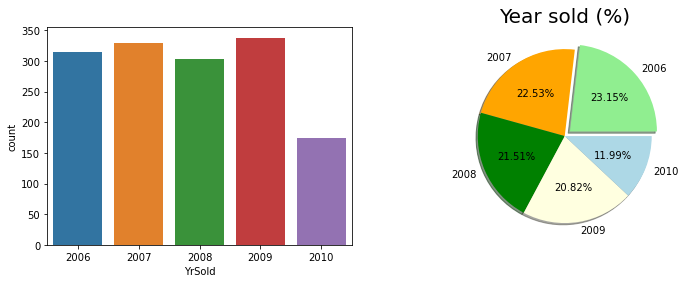

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

# sns.countplot(y='diagnosis', data=df, palette='Set2',ax=axes[0])
sns.countplot(train_df['YrSold'],label="Count",ax=axes[0])

labels = ['2006', '2007','2008','2009','2010']
size = train_df['YrSold'].value_counts()
colors = ['lightgreen', 'orange','green','lightyellow','lightblue']
explode = [0.08, 0,0,0,0]
# plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Year sold (%)', fontsize = 20)
plt.axis('off')

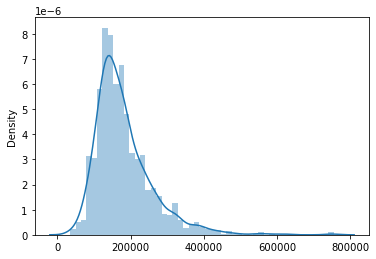

In [12]:
sns.distplot(x = (train_df["SalePrice"]))
plt.show()

In [13]:
# f, axes = plt.subplots(1, 2)
# sns.distplot(x= train_df["SalePrice"] , ax=axes[0])
# sns.distplot(x= train_df["SalePrice"] , ax=axes[1])

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Checking more 700K homes

In [14]:
train_df[(train_df["SalePrice"]> 700000)].T


,691,1182
Id,692,1183
MSSubClass,60,60
MSZoning,RL,RL
LotFrontage,104,160
LotArea,21535,15623
...,...,...
MoSold,1,7
YrSold,2007,2007
SaleType,WD,WD
SaleCondition,Normal,Abnorml


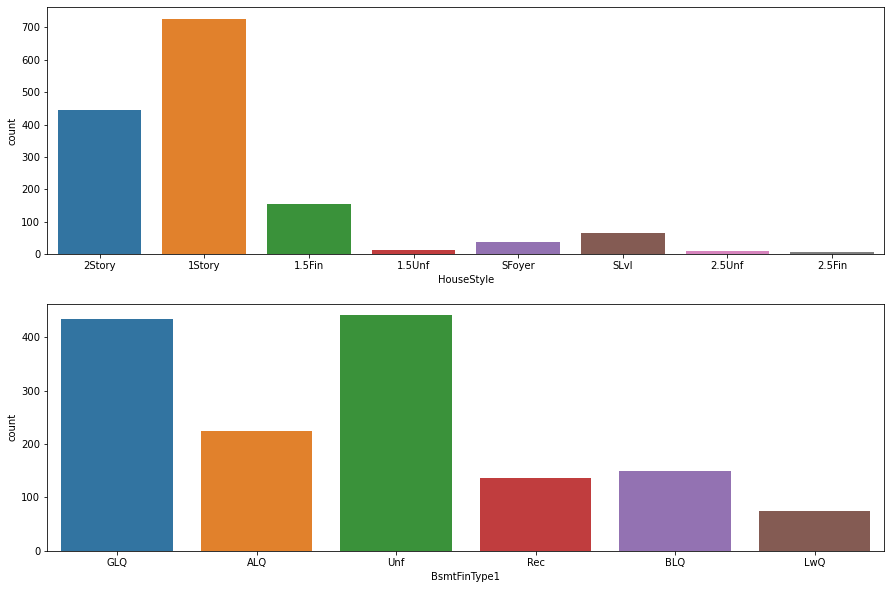

In [15]:
#Categorical variable
f, axes = plt.subplots(2, 1,figsize=(15, 10))
sns.countplot(x = train_df["HouseStyle"], ax=axes[0])
sns.countplot(x = train_df["BsmtFinType1"], ax=axes[1])
fig.tight_layout(pad=3.0)

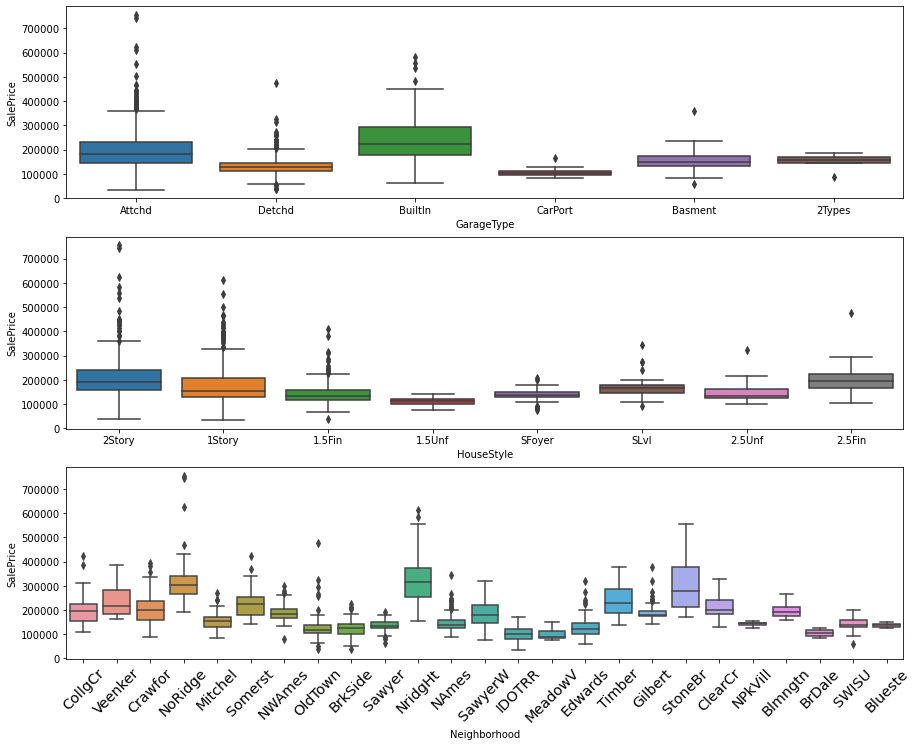

In [16]:
f, axes = plt.subplots(3, 1,figsize=(15, 12))

chart1 = sns.boxplot(x = train_df["GarageType"], y = train_df["SalePrice"],ax=axes[0])
chart2 = sns.boxplot(x = train_df["HouseStyle"], y = train_df["SalePrice"],ax=axes[1])
chart3 = sns.boxplot(x = train_df["Neighborhood"], y = train_df["SalePrice"],ax=axes[2])
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45, fontsize='x-large')
None

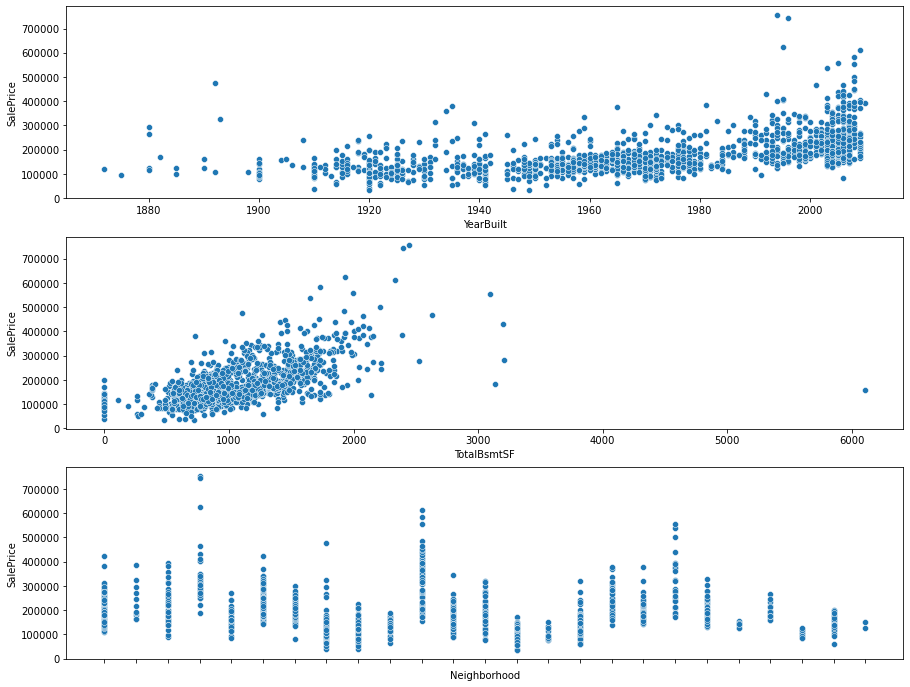

In [17]:
f, axes = plt.subplots(3, 1,figsize=(15, 12))

chart1 = sns.scatterplot(x = train_df["YearBuilt"], y = train_df["SalePrice"],ax=axes[0])
chart2 = sns.scatterplot(x = train_df["TotalBsmtSF"], y = train_df["SalePrice"],ax=axes[1])
chart3 = sns.scatterplot(x = train_df["Neighborhood"], y = train_df["SalePrice"],ax=axes[2])
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45, fontsize='x-large')
None

In [18]:
# checking the outliers
print("Year Built (min, max)   : ",min(train_df["YearBuilt"]),max(train_df["YearBuilt"]))
print("Sale Price (min, max)   : ",min(train_df["SalePrice"]),max(train_df["SalePrice"]))

Year Built (min, max)   :  1872 2010
Sale Price (min, max)   :  34900 755000


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Correlation Matrix

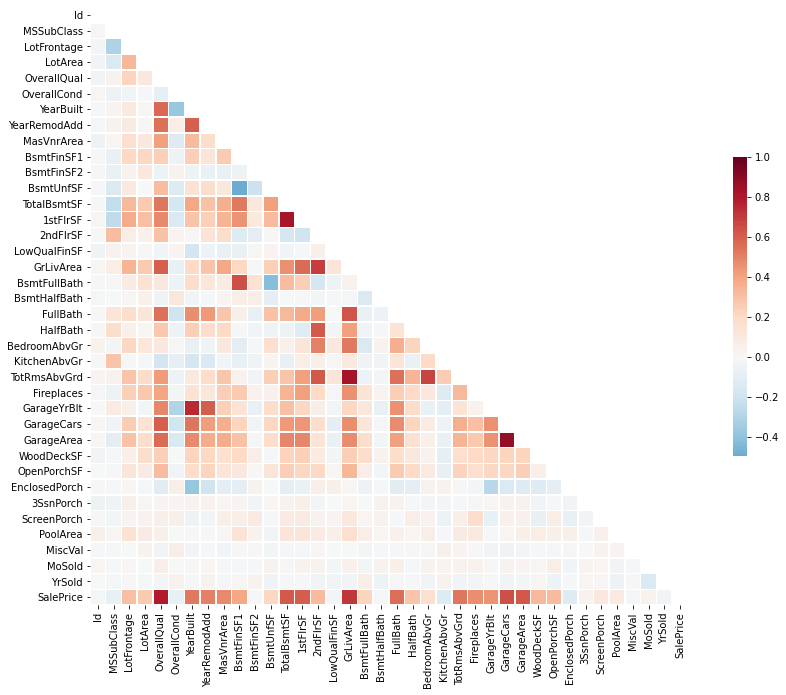

In [19]:
from string import ascii_letters
corr = train_df[numerical_cols].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False, cmap="RdBu_r")


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Strong correlation variables (GE 0.75 and LE -0.75)

In [20]:
#Here is the ><=0.75 correlation values
def corr_maxvals(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corr_maxvals(train_df[numerical_cols], .75)


YearBuilt    GarageYrBlt     0.750615
OverallQual  SalePrice       0.790982
TotalBsmtSF  1stFlrSF        0.819530
GrLivArea    TotRmsAbvGrd    0.825489
GarageCars   GarageArea      0.882475
Id           Id                   NaN
dtype: float64

In [21]:
display(train_df.shape,test_df.shape)

(1460, 81)

(1459, 80)

In [22]:
#concatinate train and test data, first drop the 'SalePrice' from train data
# train.shape is (1460,81) and test.shape(1459,80)
# so, test dat is equal to train set. Here I am going to concat and split the dataset
from sklearn import preprocessing

train_df1 = train_df.drop('SalePrice',axis=1)

tot_data = pd.concat([train_df1,test_df])
display(tot_data.shape)

le = preprocessing.LabelEncoder()
%run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Github/categorical2numerical.py'
categorical2numerical(tot_data)

(2919, 80)

In [23]:
display(train_df.shape,test_df.shape)

(1460, 81)

(1459, 80)

In [24]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,2,1,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,0,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,2,1,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,...,0,0,2,2,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,1,3,3,0,...,0,1,2,2,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,1,3,3,0,...,0,2,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,1,3,3,0,...,0,1,2,2,0,4,2010,8,4,142125


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Split the data into train and test data

In [25]:
from sklearn.model_selection import train_test_split
X = train_df.drop('SalePrice',axis = 1)
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 80), (292, 80), (1168,), (292,))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Checking columns

In [27]:
#if shapes are not same (columns) and remove excess ones
for col in list(X_train.columns):
    if col not in list(X_test.columns):
        X_train = X_train.drop([col], axis = 1)

X_train.shape, y_train.shape, X_test.shape

((1168, 80), (1168,), (292, 80))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Recursive Feature Elimination (RFE)
    
- RFE method is used to reduce the dataset. It is an efficient way to select the required features to train the models.

In [28]:
#Recursive Feature Elimination

from sklearn.svm import SVR
from sklearn.feature_selection import RFE
estimator = SVR(kernel="linear")
#Use RFE to remove not significant features from the initial model.
selector = RFE(estimator, step=1)
selector = selector.fit(X, y)
#Test new model
#New features dataframe containing only selected features through RFE
X_RFE = X[X.columns[selector.support_]]
# lin_reg(X_RFE, y)

display(X_RFE.shape, y.shape)



(1460, 40)

(1460,)

In [29]:
#Datset split
X_train, X_test, y_train, y_test = train_test_split(X_RFE, y, test_size=0.20, random_state=42)

datset = ['X_train','X_test','y_train','y_test']
shape = [X_train.shape, X_test.shape,y_train.shape, y_test.shape]

dataset = pd.DataFrame({
    'split_data': datset,
    'shape': shape
})
dataset

,split_data,shape
0,X_train,"(1168, 40)"
1,X_test,"(292, 40)"
2,y_train,"(1168,)"
3,y_test,"(292,)"


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Algorithms: before finalising the Grid search paramaters 

In [31]:
# ALGORITHM SELECTION AND INITIALIZATION
models = [Lasso(), GradientBoostingRegressor(),RandomForestRegressor(), xgb.XGBRegressor()]

# CREATING TABLE TO COMPARE MODEL ACCURACY
columns = ['Name', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

# INDEXING THROUGH MODELS AND SAVING PERFORMANCE TO TABLE
row_index = 0
percent = 100 
for alg in models:
    model_name = alg.__class__.__name__
    print(model_name)
    before_model_compare.loc[row_index, 'Name'] = model_name
    alg.fit(X_train, y_train)
    y_hat = alg.predict(X_test)
    print ("R-squared for Train: %.3f" %alg.score(X_train, y_train)) 
    print("R-squared for Test: %.3f" %alg.score(X_test, y_test))
    

Lasso
R-squared for Train: 0.831
R-squared for Test: 0.839
GradientBoostingRegressor
R-squared for Train: 0.960
R-squared for Test: 0.891
RandomForestRegressor
R-squared for Train: 0.977
R-squared for Test: 0.884
XGBRegressor
R-squared for Train: 1.000
R-squared for Test: 0.891


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Lasso Regression
    
- Lasso (Least Absolute Shrinkage Selector Operator) Regression reduces the number of dependent variables, in a similar case of ridge regression.
- Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients.
- Lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable.
    

In [32]:
#LASSO regression Grid search paramaters and best estimator
lss = Lasso()
lss_params = {'alpha': [5e-4, 0.0001], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 
                   'precompute': [False],'max_iter': [100,200,300], 'tol': [1e-2], 'selection': ['random'], 
                   'random_state': [None]}
grid_lss = GridSearchCV(estimator=lss, param_grid = lss_params, cv = 2, n_jobs=-1)
grid_lss.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0005, 0.0001], 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [100, 200, 300],
                         'normalize': [False], 'precompute': [False],
                         'random_state': [None], 'selection': ['random'],
                         'tol': [0.01]})

In [33]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lss.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_lss.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_lss.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Lasso(alpha=0.0001, max_iter=100, selection='random', tol=0.01)

 The best score across ALL searched params:
 0.7783281885823723

 The best parameters across ALL searched params:
 {'alpha': 0.0001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.01}


In [34]:
lss_param_grid = {'alpha': 0.0005, 'max_iter': 100, 'selection': 'random', 'random_state': None}

lss_model = Lasso(**lss_param_grid)
lss_model.fit(X_train, y_train)
y_hatlss = lss_model.predict(X_test)

lss_train_acc = lss_model.score(X_train, y_train)
lss_test_acc = lss_model.score(X_test, y_test)
print ("Train accuracy: %.3f" %(lss_train_acc*100)) 
print("Test accuracy: %.3f" %(lss_test_acc*100))
lss_mae = mean_absolute_error(y_test, y_hatlss)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hatlss))
print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hatlss)))
y_hat_train = lss_model.predict(X_train)
print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))

#Compare predicted and actual values
print('Mean Predicted Selling Price:', y_hatlss.mean())
print('Mean Selling Price:', y_test.mean())

Train accuracy: 83.059
Test accuracy: 83.905
Mean Absolute Error: 21593.116979319577
Root Mean Squared Error test: 35136.50022955477
Root Mean Squared Error train: 31787.68784549066
Mean Predicted Selling Price: 176730.6326584539
Mean Selling Price: 178839.81164383562


____
_____

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Gradient Boosting Regressor (GBR)
- GBR is a ensemble decision tree regressor models.
- Gradient boosting is one of the most poweful technique for building predictive models.
- At each step, a new tree is trained against the negative gradient of the loss function.

In [35]:
GBR = GradientBoostingRegressor()
params = {'n_estimators':[50,100,200], 'max_depth':[3], 'learning_rate':[0.1,0.05], 'criterion':['mse']}
grid_GBR = GridSearchCV(estimator=GBR, param_grid = params, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.1, 0.05],
                         'max_depth': [3], 'n_estimators': [50, 100, 200]})

In [36]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(criterion='mse', n_estimators=200)

 The best score across ALL searched params:
 0.8288917436976471

 The best parameters across ALL searched params:
 {'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [37]:
params = {'n_estimators':200, 'max_depth':3, 'learning_rate':0.1, 'criterion':'mse'}
GBR_model = GradientBoostingRegressor(**params)
GBR_model.fit(X_train, y_train)
y_hatgs = GBR_model.predict(X_test)

gbr_train_acc = GBR_model.score(X_train, y_train)
gbr_test_acc = GBR_model.score(X_test, y_test)
print ("Train accuracy: %.3f" %(gbr_train_acc*100.))
print("Test accuracy: %.3f" %(gbr_test_acc*100))

gbr_mae = mean_absolute_error(y_test, y_hatgs)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hatlss))
print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hatgs)))
y_hat_train = GBR_model.predict(X_train)
print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))

#Compare predicted and actual values
print('Mean Predicted Selling Price:', y_hatgs.mean())
print('Mean Selling Price:', y_test.mean())

Train accuracy: 97.568
Test accuracy: 89.375
Mean Absolute Error: 21593.116979319577
Root Mean Squared Error test: 28548.343439493903
Root Mean Squared Error train: 12043.550396453695
Mean Predicted Selling Price: 179418.97864676296
Mean Selling Price: 178839.81164383562


____
____

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Random Forest Regressor (RFR)
- A RFR is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predective accuracy and control over-fitting.

In [38]:
#Random Forest Regressor
RFR_params = {'bootstrap':[True], 'max_depth':[80,90,100,110], 'max_features':[2,3],'min_samples_leaf':[2,3,4],
             'min_samples_split':[8,10,12],'n_estimators':[50,100,150]}

RF = RandomForestRegressor()
grid_RF = GridSearchCV(estimator=RF, param_grid = RFR_params, cv = 2, n_jobs=-1)
grid_RF.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50, 100, 150]})

In [39]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=2,
                      min_samples_split=8)

 The best score across ALL searched params:
 0.796307986196051

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}


In [40]:
RFR_param_grid = {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 90, 'min_samples_split': 8,'min_samples_leaf': 2}

RFR_model = RandomForestRegressor(**RFR_param_grid)
RFR_model.fit(X_train, y_train)
y_hatgs = RFR_model.predict(X_test)

rfr_train_acc = RFR_model.score(X_train, y_train)
rfr_test_acc = RFR_model.score(X_test, y_test)
print ("Train accuracy: %.3f" %RFR_model.score(X_train, y_train)) 
print("Test accuracy: %.3f" %RFR_model.score(X_test, y_test))

rfr_mae = mean_absolute_error(y_test, y_hatgs)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hatgs))
print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hatgs)))
y_hat_train = RFR_model.predict(X_train)
print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))


#Compare predicted and actual values
print('Mean Predicted Selling Price:', y_hatgs.mean())
print('Mean Selling Price:', y_test.mean())

Train accuracy: 0.951
Test accuracy: 0.873
Mean Absolute Error: 19586.319749043803
Root Mean Squared Error test: 31264.228383252277
Root Mean Squared Error train: 17010.279949113086
Mean Predicted Selling Price: 178596.1768341365
Mean Selling Price: 178839.81164383562


____
_____

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">ElasticNet Regressor (ENR)
- ENR is a regularized regression method that linearly combines the L1 and L2 penalties of the Lasso and Ridge methods.

In [41]:
#ElasticNet Regressor
ENR_params = {'alpha': [1e-3, 0.0005], 'copy_X': [True], 'l1_ratio': [0.6, 0.9], 'fit_intercept': [True], 
                 'normalize': [False],'precompute': [False], 'max_iter': [50,100,200], 'tol': [1e-3], 'selection': ['random'],
                 'random_state': [None]}

ENR = ElasticNet()
grid_ENR = GridSearchCV(estimator=ENR, param_grid = ENR_params, cv = 2, n_jobs=-1)
grid_ENR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.0005], 'copy_X': [True],
                         'fit_intercept': [True], 'l1_ratio': [0.6, 0.9],
                         'max_iter': [50, 100, 200], 'normalize': [False],
                         'precompute': [False], 'random_state': [None],
                         'selection': ['random'], 'tol': [0.001]})

In [42]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_ENR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_ENR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_ENR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 ElasticNet(alpha=0.001, l1_ratio=0.6, max_iter=50, selection='random',
           tol=0.001)

 The best score across ALL searched params:
 0.7790978345632817

 The best parameters across ALL searched params:
 {'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.6, 'max_iter': 50, 'normalize': False, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.001}


In [43]:
ENR_param_grid = {'alpha': 1e-3, 'copy_X': True, 'l1_ratio': 0.6, 'fit_intercept': True, 
                 'normalize': False,'precompute': False, 'max_iter': 50, 'tol': 1e-3, 'selection': 'random'}

ENR_model = ElasticNet(**ENR_param_grid)
ENR_model.fit(X_train, y_train)
y_hatenr = ENR_model.predict(X_test)

enr_train_acc = ENR_model.score(X_train, y_train)
enr_test_acc = ENR_model.score(X_test, y_test)
print ("Train accuracy: %.3f" %ENR_model.score(X_train, y_train)) 
print("Test accuracy: %.3f" %ENR_model.score(X_test, y_test))

enr_mae = mean_absolute_error(y_test, y_hatenr)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hatenr))
print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hatenr)))
y_hat_train = ENR_model.predict(X_train)
print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))


#Compare predicted and actual values
print('Mean Predicted Selling Price:', y_hatenr.mean())
print('Mean Selling Price:', y_test.mean())

Train accuracy: 0.831
Test accuracy: 0.839
Mean Absolute Error: 21591.608534243893
Root Mean Squared Error test: 35138.89270723226
Root Mean Squared Error train: 31787.98424812896
Mean Predicted Selling Price: 176718.54215297563
Mean Selling Price: 178839.81164383562


___
____
######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">XGBoost Regressor (XGBR)
- XGBoost is an efficient implementation of gradient boosting that can be used for regression predective modeling.
    

In [44]:
#This one take long time but very useful for finding the grid seacrh and parameters selection
# #XGBRegressor
# XGB_params = {'max_depth': [3], 'learning_rate': [0.1, 0.05], 'n_estimators': [100,200,300], 'booster': ['gbtree'], 
#                   'gamma': [0, 0.0468], 'reg_alpha': [0.1, 0.4640], 'reg_lambda': [0.5,0.7, 0.8571], 
#                   'max_delta_step': [0], 'min_child_weight': [1, 1.7817], 'colsample_bytree': [.5, 0.4603],
#                   'colsample_bylevel': [0.2], 'scale_pos_weight': [1]}

# xgb1 = xgb.XGBRegressor()
# grid_xgb = GridSearchCV(estimator=xgb1, param_grid = XGB_params, cv = 2, n_jobs=-1)
# grid_xgb.fit(X_train, y_train)

In [45]:
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_xgb.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_xgb.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_xgb.best_params_)

In [46]:
XGB_param_grid = {'max_depth': 3, 'learning_rate': 0.05, 'n_estimators': 300, 'booster': 'gbtree', 
                  'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.8571, 
                  'max_delta_step': 0, 'min_child_weight': 1, 'colsample_bytree': 0.5,
                  'colsample_bylevel': 0.2, 'scale_pos_weight': 1}

XGB_model = xgb.XGBRegressor(**XGB_param_grid)
XGB_model.fit(X_train, y_train)
y_hatxgb = XGB_model.predict(X_test)

xgbr_train_acc = XGB_model.score(X_train, y_train)
xgbr_test_acc = XGB_model.score(X_test, y_test)
print ("Train accuracy: %.3f" %XGB_model.score(X_train, y_train)) 
print("Test accuracy: %.3f" %XGB_model.score(X_test, y_test))

xgbr_mae = mean_absolute_error(y_test, y_hatxgb)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hatxgb))
print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hatxgb)))
y_hat_train = XGB_model.predict(X_train)
print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))


#Compare predicted and actual values
print('Mean Predicted Selling Price:', y_hatxgb.mean())
print('Mean Selling Price:', y_test.mean())

Train accuracy: 0.955
Test accuracy: 0.894
Mean Absolute Error: 18176.018527932363
Root Mean Squared Error test: 28520.089904019744
Root Mean Squared Error train: 16438.43222851255
Mean Predicted Selling Price: 179310.94
Mean Selling Price: 178839.81164383562


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Results DataFrame

In [47]:
#Accuracies and errors in tabluar format
df_res = pd.DataFrame({
    "Model":['LassoReg','GradientBoostingReg','RandomForestReg', 'ElasticNetreg','XGBReg'],
    "Train_acc":[lss_train_acc,gbr_train_acc,rfr_train_acc,enr_train_acc,xgbr_train_acc],
    "test_acc":[lss_test_acc,gbr_test_acc,rfr_test_acc,enr_test_acc,xgbr_test_acc],
    "MAE":[lss_mae,gbr_mae,rfr_mae,enr_mae,xgbr_mae]
})

df_res

,Model,Train_acc,test_acc,MAE
0,LassoReg,0.830590,0.839045,21593.116979
1,GradientBoostingReg,0.975682,0.893745,17816.493234
2,RandomForestReg,0.951488,0.872567,19586.319749
3,ElasticNetreg,0.830586,0.839024,21591.608534
4,XGBReg,0.954695,0.893956,18176.018528
